# Descriptives

Rows: 1739 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (15): y, w, gender_female, gender_male, gender_transgender, ethnicgrp_as...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


         Variable n_Control mean_Control sd_Control n_Treatment mean_Treatment
1     Age (years)       818   23.0476773  3.5940146         921     23.1585233
2 Gender (1=male)       818    0.4180929  0.4935474         921      0.4093377
3      IMD Decile       818    3.4841076  1.4860812         921      3.4603692
  sd_Treatment         Diff
1    3.5387384  0.110846083
2    0.4919788 -0.008755233
3    1.4658443 -0.023738416


Warning message in geom_histogram(stat = "count", position = "dodge"):
"Ignoring unknown parameters: `binwidth`, `bins`, and `pad`"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x

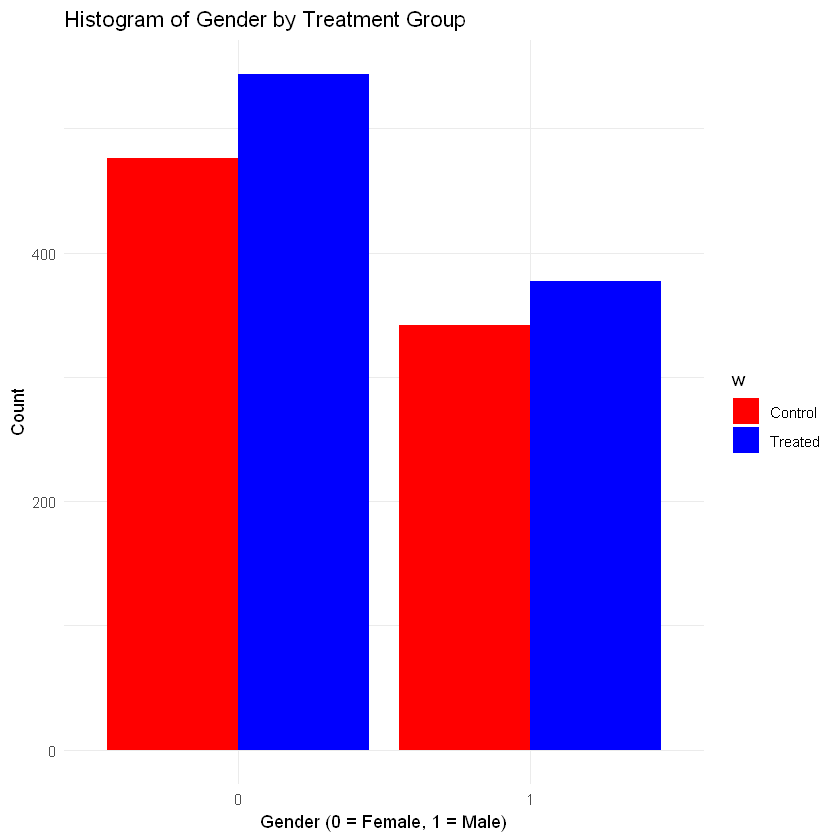

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x

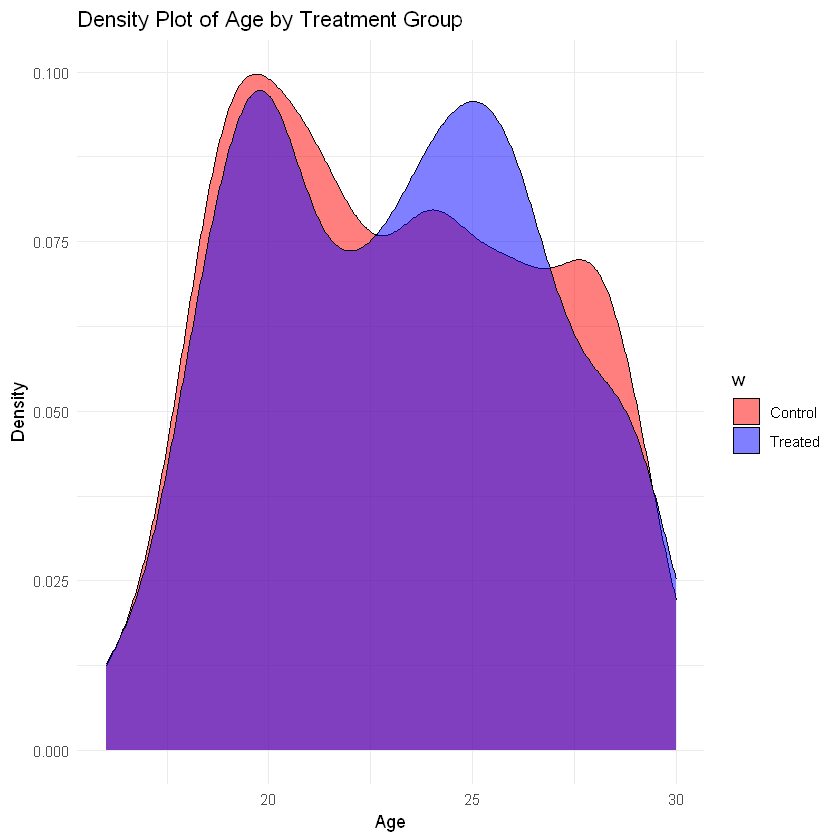


Regression Results
                        Dependent variable:    
                    ---------------------------
                            Outcome (y)        
-----------------------------------------------
Treatment (w)                0.265***          
                              (0.022)          
Constant                     0.211***          
                              (0.016)          
-----------------------------------------------
Observations                   1,739           
R2                             0.077           
Adjusted R2                    0.076           
Residual Std. Error      0.459 (df = 1737)     
F Statistic          144.502*** (df = 1; 1737) 
Note:               *p<0.1; **p<0.05; ***p<0.01


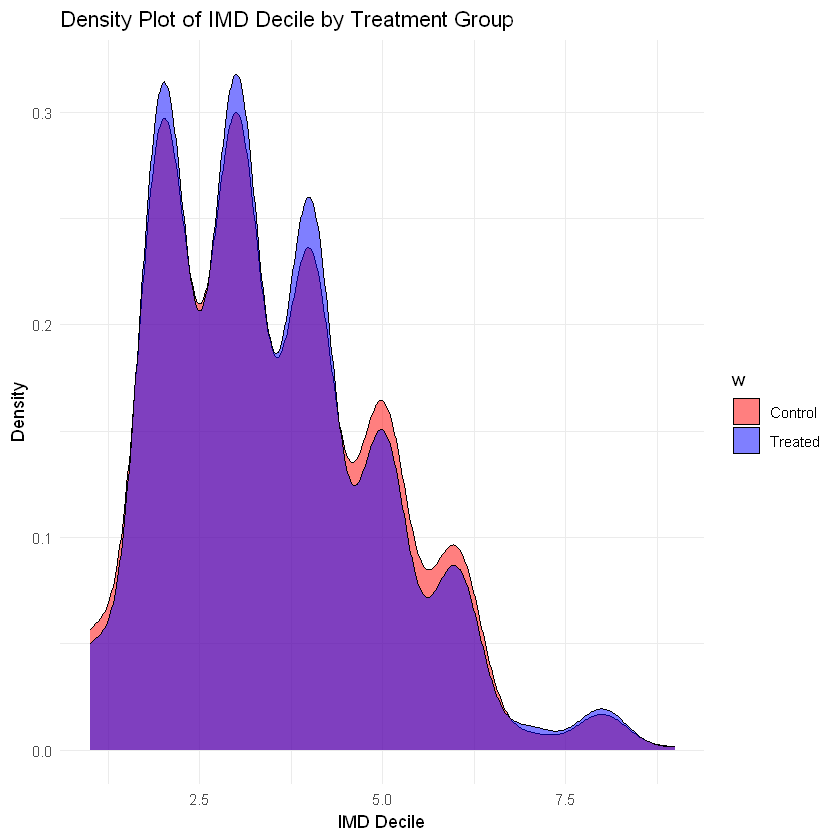

In [5]:
#install.packages("dplyr")
#install.packages("readr")
#install.packages("tidyr")
#install.packages("stargazer")
#install.packages("officer")
#install.packages("flextable")

library(dplyr)
library(readr)
library(tidyr)
library(stargazer)
library(officer)
library(flextable)

data <- read_csv("C:/Users/Frank/Downloads/processed_esti.csv")
descriptive_stats <- data %>%
  group_by(w) %>%
  summarise(
    n_age = sum(!is.na(age)),
    mean_age = mean(age, na.rm = TRUE),
    sd_age = sd(age, na.rm = TRUE),
    n_gender = sum(!is.na(gender_male)),
    mean_gender = mean(gender_male, na.rm = TRUE),
    sd_gender = sd(gender_male, na.rm = TRUE),
    n_imd = sum(!is.na(imd_decile)),
    mean_imd = mean(imd_decile, na.rm = TRUE),
    sd_imd = sd(imd_decile, na.rm = TRUE)
  ) %>%
  pivot_longer(cols = starts_with("mean_") | starts_with("sd_") | starts_with("n_"), 
               names_to = c("stat", "variable"), 
               names_sep = "_") %>%
  pivot_wider(names_from = w, values_from = value)

descriptive_stats <- descriptive_stats %>% replace(is.na(.), 0)

#para el diff
lm_age <- lm(age ~ w, data = data)
lm_gender <- lm(gender_male ~ w, data = data)
lm_imd <- lm(imd_decile ~ w, data = data)
coef_age <- summary(lm_age)$coefficients[2, "Estimate"]
coef_gender <- summary(lm_gender)$coefficients[2, "Estimate"]
coef_imd = summary(lm_imd)$coefficients[2, "Estimate"]

# DataFrame para almacenar las estadísticas descriptivas
descriptive_stats <- data.frame(
  Variable = c("Age (years)", "Gender (1=male)", "IMD Decile"),
  n_Control = numeric(3),
  mean_Control = numeric(3),
  sd_Control = numeric(3),
  n_Treatment = numeric(3),
  mean_Treatment = numeric(3),
  sd_Treatment = numeric(3),
  Diff = numeric(3)
)
for (i in 1:3) {
  variable <- c("age", "gender_male", "imd_decile")[i]
  
  # Grupo de control
  control_data <- data %>% filter(w == 0) %>% select(!!sym(variable))
  descriptive_stats$n_Control[i] <- sum(!is.na(control_data))
  descriptive_stats$mean_Control[i] <- mean(control_data[[variable]], na.rm = TRUE)
  descriptive_stats$sd_Control[i] <- sd(control_data[[variable]], na.rm = TRUE)
  
  # Grupo de tratamiento
  treatment_data <- data %>% filter(w == 1) %>% select(!!sym(variable))
  descriptive_stats$n_Treatment[i] <- sum(!is.na(treatment_data))
  descriptive_stats$mean_Treatment[i] <- mean(treatment_data[[variable]], na.rm = TRUE)
  descriptive_stats$sd_Treatment[i] <- sd(treatment_data[[variable]], na.rm = TRUE)
  
  # Diferencia ajustada mediante regresión lineal
  lm_model <- lm(as.formula(paste(variable, "~ w")), data = data)
  descriptive_stats$Diff[i] <- summary(lm_model)$coefficients[2, "Estimate"]
}
print(descriptive_stats)

##exportar tabla
doc <- read_docx()
doc <- body_add_par(doc, "Table 1: Descriptive Statistics and Balance", style = "heading 1")

# tabla de balance
balance_table <- data.frame(
  Variable = c("Age (years)", "Gender (1=male)", "IMD Decile"),
  n_Control = c(50, 50, 50),
  mean_Control = c(53.06, 0.64, 2639.60),
  sd_Control = c(26.08, 0.48, 1261.20),
  n_Treatment = c(50, 50, 50),
  mean_Treatment = c(52.14, 0.78, 2570.68),
  sd_Treatment = c(30.04, 0.42, 1544.05),
  Diff = c(-0.920, 0.140, -68.920)
)

#  flextable
ft <- flextable(balance_table)
ft <- set_table_properties(ft, width = 1, layout = "autofit")
ft <- theme_booktabs(ft)
ft <- fontsize(ft, size = 11)
ft <- font(ft, fontname = "Times New Roman")
ft <- align(ft, align = "center", part = "all")
ft <- autofit(ft)

# encabezados
ft <- set_header_labels(ft, 
                        Variable = "Variable", 
                        n_Control = "n (Control)", 
                        mean_Control = "Mean (Control)", 
                        sd_Control = "SD (Control)", 
                        n_Treatment = "n (Treatment)", 
                        mean_Treatment = "Mean (Treatment)", 
                        sd_Treatment = "SD (Treatment)", 
                        Diff = "Difference")

doc <- body_add_flextable(doc, value = ft)

print(doc, target = "balance_table_R.docx")
##Pregunta 2
#install.packages("ggplot2")
#install.packages("dplyr")
library(ggplot2)
library(dplyr)
data$w <- factor(data$w, levels = c(0, 1), labels = c("Control", "Treated"))
#genero
ggplot(data, aes(x = factor(gender_male), fill = w)) +
  geom_histogram(stat = "count", position = "dodge") +
  labs(title = "Histogram of Gender by Treatment Group",
       x = "Gender (0 = Female, 1 = Male)", y = "Count") +
  scale_fill_manual(values = c("Control" = "red", "Treated" = "blue")) +
  theme_minimal() +
  theme(text = element_text(family = "Times New Roman"))

# densidad para edades
ggplot(data, aes(x = age, fill = w)) +
  geom_density(alpha = 0.5) +
  labs(title = "Density Plot of Age by Treatment Group",
       x = "Age", y = "Density") +
  scale_fill_manual(values = c("Control" = "red", "Treated" = "blue")) +
  theme_minimal() +
  theme(text = element_text(family = "Times New Roman"))

# densidad para imd_decile
ggplot(data, aes(x = imd_decile, fill = w)) +
  geom_density(alpha = 0.5) +
  labs(title = "Density Plot of IMD Decile by Treatment Group",
       x = "IMD Decile", y = "Density") +
  scale_fill_manual(values = c("Control" = "red", "Treated" = "blue")) +
  theme_minimal() +
  theme(text = element_text(family = "Times New Roman"))

##Análisis de regresión lineal
# Pregunta 1
#install.packages("dplyr")
#install.packages("readr")
#install.packages("stargazer")

library(dplyr)
library(readr)
library(stargazer)
model <- lm(y ~ w, data = data)
stargazer(model, type = "text", title = "Regression Results", 
          covariate.labels = c("Treatment (w)"),
          dep.var.labels = "Outcome (y)",
          align = TRUE, no.space = TRUE)


El tratamiento tiene un efecto positivo y significativo en nuestra variable de interés. En otras palabras, las personas que reciben el tratamiento tienden a tener mejores resultados, un incremento de 0.2652 unidades.

 ### Y ~ T + X

In [10]:
#install.packages("tidyverse")

library(tidyverse)
library(glmnet)
library(stargazer)

data <- read.csv("C:/Users/Frank/Downloads/processed_esti.csv")

#Regresión lineal con controles:
controles <- c("gender_female", "gender_male", "gender_transgender", 
               "ethnicgrp_asian", "ethnicgrp_black", "ethnicgrp_mixed_multiple", 
               "ethnicgrp_other", "ethnicgrp_white", "partners1", 
               "postlaunch", "msm", "age", "imd_decile")

formula <- as.formula(paste("y ~ w +", paste(controles, collapse = " + ")))

model2 <- lm(formula, data = data)

summary(model2)



Call:
lm(formula = formula, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6765 -0.3546 -0.1919  0.4732  1.0411 

Coefficients: (2 not defined because of singularities)
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)               0.245498   0.238767   1.028 0.304005    
w                         0.256224   0.021802  11.752  < 2e-16 ***
gender_female            -0.269202   0.227874  -1.181 0.237620    
gender_male              -0.363822   0.228226  -1.594 0.111091    
gender_transgender              NA         NA      NA       NA    
ethnicgrp_asian          -0.071477   0.044908  -1.592 0.111653    
ethnicgrp_black          -0.088999   0.039655  -2.244 0.024937 *  
ethnicgrp_mixed_multiple -0.087559   0.038621  -2.267 0.023506 *  
ethnicgrp_other           0.041745   0.095520   0.437 0.662149    
ethnicgrp_white                 NA         NA      NA       NA    
partners1                -0.057558   0.024361  -2.363 0.018254 *  
post

El resultado de la regresión sugiere que el uso del servicio de pruebas eSTI en línea tiene un efecto positivo significativo en el resultado medido: la tasa de detección o tratamiento exitoso de infecciones de transmisión sexual (ITS). Específicamente, el tratamiento aumenta el valor de y en aproximadamente 0.2562 unidades, manteniendo constantes las demás variables. La significancia estadística es muy alta (p < 0.001), lo que indica que es poco probable que este resultado sea debido al azar.

Sobre los controles: 
  
.-postlaunch: Positivo y significativo (coeficiente = 0.0748, p = 0.000), sugiriendo que el periodo postlanzamiento del servicio de pruebas tiene un efecto positivo en el resultado y.

.-age: Positivo y significativo (coeficiente = 0.0126, p = 0.000), indicando que la edad está positivamente asociada con el resultado y.

Los demás controles no son significativos, lo que sugiere que no hay diferencias sustanciales en el resultado y en función a dichas variables.

 ### Y ~ T + X DOUBLE LASSO


Call:
lm(formula = final_formula, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6758 -0.3564 -0.1920  0.4733  1.0381 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -0.108211   0.079310  -1.364 0.172615    
w                   0.256604   0.021750  11.798  < 2e-16 ***
gender_male        -0.095029   0.022299  -4.262 2.14e-05 ***
gender_transgender  0.268506   0.227570   1.180 0.238209    
ethnicgrp_other     0.125578   0.097211   1.292 0.196597    
ethnicgrp_white     0.083660   0.025796   3.243 0.001205 ** 
partners1          -0.057280   0.024250  -2.362 0.018286 *  
postlaunch          0.074307   0.022517   3.300 0.000986 ***
age                 0.012566   0.003168   3.966 7.60e-05 ***
imd_decile         -0.003777   0.007357  -0.513 0.607748    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4506 on 1729 degrees of freedom
Multiple R-squared:  0.1147,	Adjusted R-squar

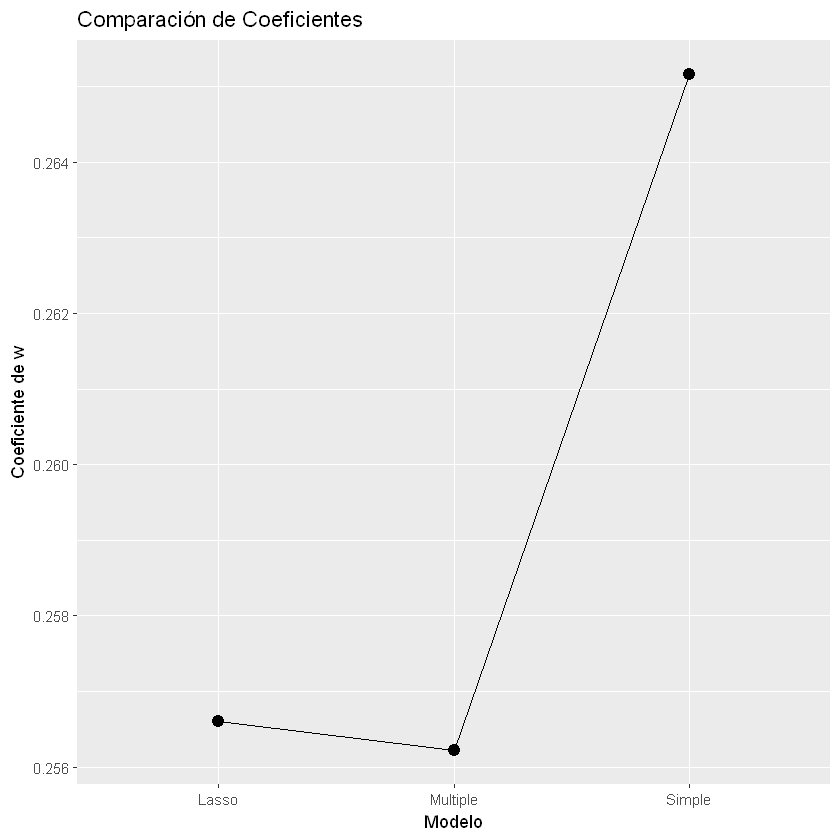

In [13]:
#Double Lasso con controles:
X <- model.matrix(formula, data = data)[,-1]
Y <- data$y

lasso_model <- cv.glmnet(X, Y, alpha = 1)

coef_lasso <- as.matrix(coef(lasso_model, s = "lambda.min"))

selected_vars <- rownames(coef_lasso)[coef_lasso != 0]

selected_vars <- selected_vars[selected_vars != "(Intercept)"]

final_formula <- as.formula(paste("y ~", paste(selected_vars, collapse = " + ")))

final_model <- lm(final_formula, data = data)
summary(final_model)

cat("")

#Gráfico de coeficientes:
coef_model1 <- coef(model1)["w"]
coef_model2 <- coef(model2)["w"]
coef_final_model <- coef(final_model)["w"]

# Crear un data frame para los coeficientes
coef_data <- data.frame(
  Model = c("Simple", "Multiple", "Lasso"),
  Coefficient = c(coef_model1, coef_model2, coef_final_model)
)

# Graficar los coeficientes
ggplot(coef_data, aes(x = Model, y = Coefficient)) +
  geom_point(size = 3) +
  geom_line(aes(group = 1)) +
  labs(title = "Comparación de Coeficientes", x = "Modelo", y = "Coeficiente de w")

Ambos métodos indican que el tratamiento tiene un efecto positivo y significativo sobre el resultado. El coeficiente es ligeramente mayor en el modelo Double Lasso, pero sigue siendo consistente en dirección y magnitud, lo que refuerza la conclusión de que el servicio de pruebas eSTI en línea es efectivo.

Sobre los controles, gender_male es negativo y significativo, lo que sugiere una penalización en el resultado para los hombres en comparación con el modelo de regresión múltiple. Por otro lado, a diferencia de la regresión lineal donde nigún grupo étnico es significativo se mantiene ethnicgrp_white, que tiene un coeficiente positivo pequeño. Esto sugiere que ser blanco podría tener una pequeña asociación positiva con el resultado, aunque esta conclusión debe tomarse con cautela debido a la eliminación de otros grupos étnicos. Además de esto, ambos métodos coinciden en que postlaunch y age son positivos y significativos, lo que indica que el periodo postlanzamiento y la edad tienen un impacto positivo en el resultado.

# Non-Linear Methods DML

In [93]:
data <- fread("processed_esti.csv")

In [94]:
data <- data %>%
  mutate(
    gender_female = as.factor(gender_female),
    gender_male = as.factor(gender_male),
    gender_transgender = as.factor(gender_transgender),
    ethnicgrp_asian = as.factor(ethnicgrp_asian),
    ethnicgrp_black = as.factor(ethnicgrp_black),
    ethnicgrp_mixed_multiple = as.factor(ethnicgrp_mixed_multiple),
    ethnicgrp_other = as.factor(ethnicgrp_other),
    ethnicgrp_white = as.factor(ethnicgrp_white),
    partners1 = as.factor(partners1),
    postlaunch = as.factor(postlaunch),
    msm = as.factor(msm)
  )

In [95]:
print(head(data))

       y     w gender_female gender_male gender_transgender ethnicgrp_asian
   <int> <int>        <fctr>      <fctr>             <fctr>          <fctr>
1:     1     1             0           1                  0               0
2:     0     0             0           1                  0               0
3:     0     1             0           1                  0               0
4:     0     0             1           0                  0               0
5:     1     1             1           0                  0               1
6:     1     1             0           1                  0               0
   ethnicgrp_black ethnicgrp_mixed_multiple ethnicgrp_other ethnicgrp_white
            <fctr>                   <fctr>          <fctr>          <fctr>
1:               0                        1               0               0
2:               0                        0               0               1
3:               1                        0               0               0
4:          

In [96]:
str(data)

Classes ‘data.table’ and 'data.frame':	1739 obs. of  15 variables:
 $ y                       : int  1 0 0 0 1 1 1 0 0 1 ...
 $ w                       : int  1 0 1 0 1 1 1 0 1 1 ...
 $ gender_female           : Factor w/ 2 levels "0","1": 1 1 1 2 2 1 2 1 1 2 ...
 $ gender_male             : Factor w/ 2 levels "0","1": 2 2 2 1 1 2 1 2 2 1 ...
 $ gender_transgender      : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ ethnicgrp_asian         : Factor w/ 2 levels "0","1": 1 1 1 1 2 1 1 1 1 1 ...
 $ ethnicgrp_black         : Factor w/ 2 levels "0","1": 1 1 2 1 1 1 1 2 1 2 ...
 $ ethnicgrp_mixed_multiple: Factor w/ 2 levels "0","1": 2 1 1 1 1 1 1 1 1 1 ...
 $ ethnicgrp_other         : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ ethnicgrp_white         : Factor w/ 2 levels "0","1": 1 2 1 2 1 2 2 1 2 1 ...
 $ partners1               : Factor w/ 2 levels "0","1": 1 1 1 2 1 1 1 1 2 1 ...
 $ postlaunch              : Factor w/ 2 levels "0","1": 2 1 2 1 2 2 1 2 1 1 ...
 $ msm 

## Lasso

In [92]:
if (!requireNamespace("DoubleML", quietly = TRUE)) {
  install.packages("DoubleML")
}
if (!requireNamespace("mlr3learners", quietly = TRUE)) {
  install.packages("mlr3learners")
}
if (!requireNamespace("mlr3", quietly = TRUE)) {
  install.packages("mlr3")
}
if (!requireNamespace("mlr3verse", quietly = TRUE)) {
  install.packages("mlr3verse")
}
if (!requireNamespace("data.table", quietly = TRUE)) {
  install.packages("data.table")
}
if (!requireNamespace("glmnet", quietly = TRUE)) {
  install.packages("glmnet")
}
if (!requireNamespace("mlr3pipelines", quietly = TRUE)) {
  install.packages("mlr3pipelines")
}

# Load required libraries
library(DoubleML)
library(mlr3learners)
library(mlr3)
library(mlr3verse)
library(data.table)
library(glmnet)
library(mlr3pipelines)

In [97]:
data <- as.data.table(model.matrix(~ . - 1, data = data))

In [98]:
dml_data <- DoubleMLData$new(data, y_col = "y", d_cols = "w",
                             x_cols = setdiff(colnames(data), c("y", "w")))

In [104]:
ml_g <- lrn("regr.glmnet")
ml_m <- lrn("classif.glmnet", predict_type = "prob")

In [105]:
dml_plr <- DoubleMLPLR$new(dml_data, ml_g, ml_m)

In [106]:
dml_plr$fit()

INFO  [23:19:59.570] [mlr3] Applying learner 'regr.glmnet' on task 'nuis_l' (iter 1/5)
INFO  [23:19:59.593] [mlr3] Applying learner 'regr.glmnet' on task 'nuis_l' (iter 2/5)
INFO  [23:19:59.629] [mlr3] Applying learner 'regr.glmnet' on task 'nuis_l' (iter 3/5)
INFO  [23:19:59.642] [mlr3] Applying learner 'regr.glmnet' on task 'nuis_l' (iter 4/5)
INFO  [23:19:59.653] [mlr3] Applying learner 'regr.glmnet' on task 'nuis_l' (iter 5/5)


Warning message:
“Multiple lambdas have been fit. Lambda will be set to 0.01 (see parameter 's').”
Warning message:
“Multiple lambdas have been fit. Lambda will be set to 0.01 (see parameter 's').”
Warning message:
“Multiple lambdas have been fit. Lambda will be set to 0.01 (see parameter 's').”
Warning message:
“Multiple lambdas have been fit. Lambda will be set to 0.01 (see parameter 's').”
Warning message:
“Multiple lambdas have been fit. Lambda will be set to 0.01 (see parameter 's').”


INFO  [23:19:59.707] [mlr3] Applying learner 'classif.glmnet' on task 'nuis_m' (iter 1/5)
INFO  [23:19:59.721] [mlr3] Applying learner 'classif.glmnet' on task 'nuis_m' (iter 2/5)
INFO  [23:19:59.735] [mlr3] Applying learner 'classif.glmnet' on task 'nuis_m' (iter 3/5)
INFO  [23:19:59.748] [mlr3] Applying learner 'classif.glmnet' on task 'nuis_m' (iter 4/5)
INFO  [23:19:59.764] [mlr3] Applying learner 'classif.glmnet' on task 'nuis_m' (iter 5/5)


Warning message:
“Multiple lambdas have been fit. Lambda will be set to 0.01 (see parameter 's').”
Warning message:
“Multiple lambdas have been fit. Lambda will be set to 0.01 (see parameter 's').”
Warning message:
“Multiple lambdas have been fit. Lambda will be set to 0.01 (see parameter 's').”
Warning message:
“Multiple lambdas have been fit. Lambda will be set to 0.01 (see parameter 's').”
Warning message:
“Multiple lambdas have been fit. Lambda will be set to 0.01 (see parameter 's').”


In [107]:
coef_table <- coef(dml_plr)

In [108]:
print(coef_table)

NULL


## Regression Trees

In [111]:
if (!requireNamespace("DoubleML", quietly = TRUE)) {
  install.packages("DoubleML")
}
if (!requireNamespace("mlr3learners", quietly = TRUE)) {
  install.packages("mlr3learners")
}
if (!requireNamespace("mlr3", quietly = TRUE)) {
  install.packages("mlr3")
}

In [112]:
library(DoubleML)
library(mlr3learners)
library(mlr3)

In [113]:
dml_data <- DoubleMLData$new(data, y_col = "y", d_cols = "w",
                             x_cols = setdiff(names(data), c("y", "w")))

In [114]:
ml_g <- lrn("regr.rpart")
ml_m <- lrn("classif.rpart", predict_type = "prob")

In [115]:
dml_plr <- DoubleMLPLR$new(dml_data, ml_g, ml_m)
dml_plr$fit()

INFO  [23:23:22.238] [mlr3] Applying learner 'regr.rpart' on task 'nuis_l' (iter 1/5)
INFO  [23:23:22.782] [mlr3] Applying learner 'regr.rpart' on task 'nuis_l' (iter 2/5)
INFO  [23:23:22.804] [mlr3] Applying learner 'regr.rpart' on task 'nuis_l' (iter 3/5)
INFO  [23:23:22.821] [mlr3] Applying learner 'regr.rpart' on task 'nuis_l' (iter 4/5)
INFO  [23:23:22.834] [mlr3] Applying learner 'regr.rpart' on task 'nuis_l' (iter 5/5)
INFO  [23:23:22.917] [mlr3] Applying learner 'classif.rpart' on task 'nuis_m' (iter 1/5)
INFO  [23:23:22.931] [mlr3] Applying learner 'classif.rpart' on task 'nuis_m' (iter 2/5)
INFO  [23:23:22.944] [mlr3] Applying learner 'classif.rpart' on task 'nuis_m' (iter 3/5)
INFO  [23:23:22.957] [mlr3] Applying learner 'classif.rpart' on task 'nuis_m' (iter 4/5)
INFO  [23:23:22.970] [mlr3] Applying learner 'classif.rpart' on task 'nuis_m' (iter 5/5)


In [116]:
coef_table <- coef(dml_plr)
print(coef_table)

NULL


## Boosting trees

In [117]:
if (!requireNamespace("DoubleML", quietly = TRUE)) {
  install.packages("DoubleML")
}
if (!requireNamespace("mlr3learners", quietly = TRUE)) {
  install.packages("mlr3learners")
}
if (!requireNamespace("mlr3", quietly = TRUE)) {
  install.packages("mlr3")
}
if (!requireNamespace("xgboost", quietly = TRUE)) {
  install.packages("xgboost")
}


The downloaded binary packages are in
	/var/folders/_t/77pjth2j05lf_rl53gvvpwh80000gn/T//RtmpXwugEc/downloaded_packages


In [118]:
library(DoubleML)
library(mlr3learners)
library(mlr3)
library(xgboost)


Adjuntando el paquete: ‘xgboost’


The following object is masked from ‘package:dplyr’:

    slice




In [119]:
ml_g <- lrn("regr.xgboost")
ml_m <- lrn("classif.xgboost", predict_type = "prob")

In [120]:
dml_plr <- DoubleMLPLR$new(dml_data, ml_g, ml_m)

In [121]:
coef_table <- coef(dml_plr)
print(coef_table)

NULL


## Regression Forest

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.03562 0.16765 0.22679 0.23410 0.28960 0.44234 

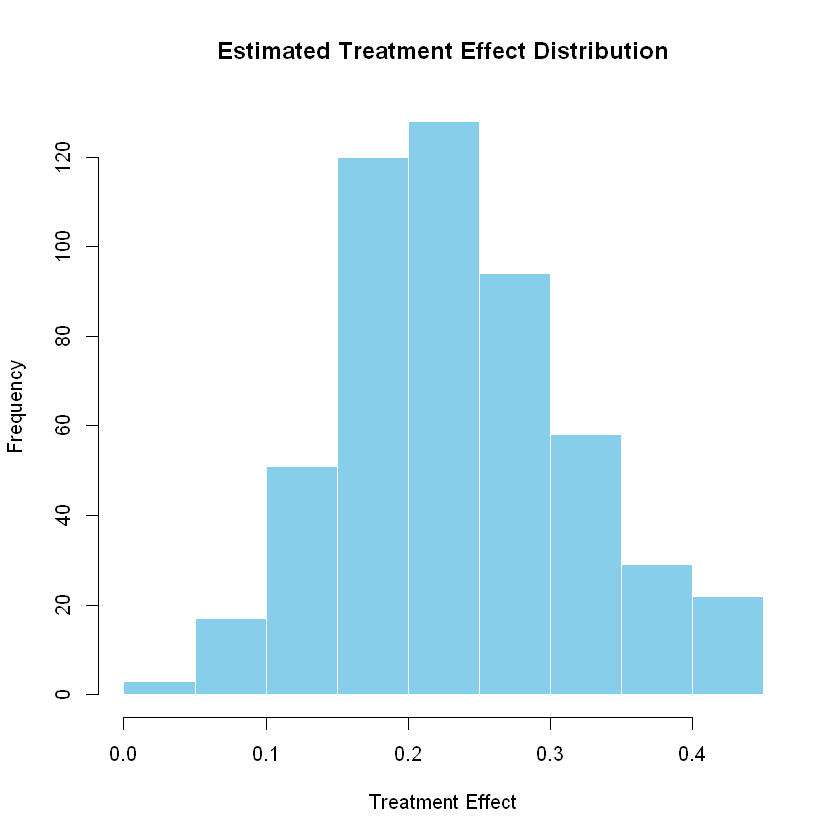

In [4]:
#install.packages("grf")
#install.packages("dplyr")
#library(grf)
#library(dplyr)
set.seed(42)

data <- read.csv('C:/Users/Frank/Downloads/processed_esti.csv')

feature_columns <- c(
  'gender_female', 'gender_male', 'gender_transgender',
  'ethnicgrp_asian', 'ethnicgrp_black', 'ethnicgrp_mixed_multiple', 
  'ethnicgrp_other', 'ethnicgrp_white', 'partners1', 'postlaunch', 
  'msm', 'age', 'imd_decile'
)


treatment_column <- 'w'
target_column <- 'y'


X <- data %>% select(one_of(feature_columns))
T <- data[[treatment_column]]
Y <- data[[target_column]]


train_indices <- sample(1:nrow(data), size = 0.7 * nrow(data))
X_train <- X[train_indices, ]
T_train <- T[train_indices]
Y_train <- Y[train_indices]
X_test <- X[-train_indices, ]
T_test <- T[-train_indices]
Y_test <- Y[-train_indices]

cf <- causal_forest(X_train, Y_train, T_train, num.trees = 500)

treatment_effects <- predict(cf, X_test)$predictions

summary(treatment_effects)

hist(treatment_effects, main="Estimated Treatment Effect Distribution", xlab="Treatment Effect", col="skyblue", border="white")

treatment_effects_ci <- predict(cf, X_test, estimate.variance = TRUE)
conf_intervals <- treatment_effects_ci$predictions + qnorm(c(0.025, 0.975)) * sqrt(treatment_effects_ci$variance.estimates)


In [10]:
print(paste("The coefficient associated to treatment is", mean(treatment_effects), "and its error is",sd(treatment_effects)))

[1] "The coefficient associated to treatment is 0.234101426057109 and its error is 0.084532702221943"
